In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ipywidgets import interact_manual
import ipywidgets as widgets
widgets.interact_manual.opts['manual_name'] = "Go!"
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# **Problem #3 - Box Models**

>Please check a standalone version of this homework at:
>
>· (Voila version):  
>
>
>
>
>
>· (Classic notebook): 
>
>

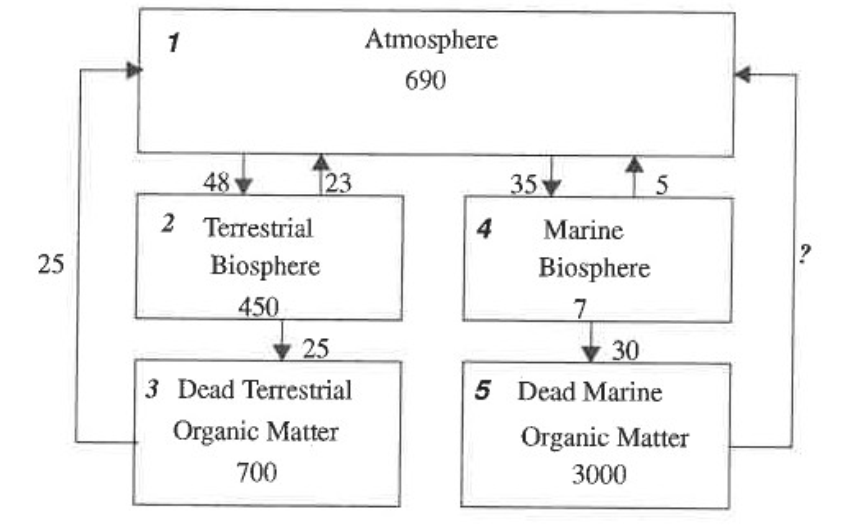

**Notation:**

The **mass** of carbon (in units of $10^{15}$ g) in each of the five boxes is denoted as $M_j$ where $j$ corresponds to the box number. For instance, $M_1 = 690$. The boxes in the model are:

- $j=1$ is the atmosphere
- $j=2$ is the terrestrial biosphere
- $j=3$ is the dead terrestrial organic matter
- $j=4$ is the marine biosphere
- $j=5$ is the dead marine organic matter

The carbon **fluxes** between boxes (in units of $10^{15}$ g/a) are denoted as $J_{i,j}$ where $i$ indicates the origin of the flux and $j$ the receiving end of the flux. For example, $J_{1,2} = 48$. Similarly, the first order **rate constants** (in units of a$^{-1}$) are denoted as $k_{i,j}$ following the same logic that for fluxes. This notation will involve transposing some matrices to keep the nomenclature rolling.

**Assumptions:**

· All outbound mass exchanges in the system are linearly dependant of the mass in the box:

\begin{equation}
\dfrac{dM_i}{dt} = \sum_\limits{m}J_{m,i} - \sum_\limits{n}J_{i,n} \quad|\quad J_{i,n} = k_{i,n}M_i
\end{equation}

· The carbon cycle is the steady-state result of multiples linear processes.

## **1. Completing the carbon cycle**

For the steady state depicted in the figure, a mass balance can be calculated around the box No. 5:

\begin{equation}
\dfrac{dM_5}{dt} = J_{4,5} - J_{5,1} = 0 \quad \Rightarrow \quad J_{5,1} = J_{4,5} = 30
\end{equation}

## **2. First order rate constants**

The mass balance of the five boxes in the system can be written in terms of the in/out fluxes or the rate constants as:

\begin{equation}
\begin{array}{rclcl}
\frac{dM_1}{dt} &=& J_{2,1} + J_{3,1} + J_{4,1} + J_{5,1} - J_{1,2} - J_{1,4} &=& k_{2,1}M_2 + k_{3,1}M_3 + k_{4,1}M_4 + k_{5,1}M_5 - (k_{1,2} + k_{1,4})M_1\\
\frac{dM_2}{dt} &=& J_{1,2} - J_{2,1} - J_{2,3} &=& k_{1,2}M_1 - (k_{2,1} + k_{2,3})M_2\\
\frac{dM_3}{dt} &=& J_{2,3} - J_{3,1} &=& k_{2,3}M_2 - k_{3,1}M_3\\
\frac{dM_4}{dt} &=& J_{1,4} - J_{4,1} - J_{4,5} &=& k_{1,4}M_1 - (k_{4,1} + k_{4,5})M_4\\
\frac{dM_5}{dt} &=& J_{4,5} - J_{5,1} &=& k_{4,5}M_4 - k_{5,1}M_5\\
\end{array}
\end{equation}

Since we have a steady-state result for $m = (M_1,M_2,M_3,M_4,M_5)$ and the corresponging fluxes $J$, we can solve for the rate constants:

\begin{equation}
k_{i,j}=\dfrac{J_{i,j}}{M^{\infty}_i}
\quad|\quad
m_{(t\to\infty)} = M^\infty=
\begin{pmatrix}
690\\450\\700\\7\\3000
\end{pmatrix}
\end{equation}

In [2]:
##################################################
## Model Inputs 
##################################################

# Steady-state mass in each box
MASS_STEADY = np.array([690,450,700,7,3000],dtype=float)

# Steady-state fluxes
FLUX = np.array([[0,48,0,35,0],\
              [23,0,25,0,0],\
              [25,0,0,0,0],\
              [5,0,0,0,30],\
              [30,0,0,0,0]\
             ],dtype=float)

##################################################
## Calculate first-order rate constants
##################################################
kRATES = np.zeros_like(FLUX)
for i in range(len(FLUX)):
    kRATES[i] = FLUX[i]/MASS_STEADY[i]

Having calculated the linear constant rates, our system of differential equations is given by the system:

\begin{equation}
\begin{array}{rl}
m'(t)=& Km(t)\\
\\
=& 
\begin{pmatrix}
- (k_{1,2} + k_{1,4}) & k_{2,1} & k_{3,1} & k_{4,1} & k_{5,1}\\
k_{1,2} & - (k_{2,1} + k_{2,3}) & 0 & 0 & 0 \\
0 & k_{2,3} & - k_{3,1} & 0 & 0 \\
k_{1,4} & 0 & 0 & -(k_{4,1} + k_{4,5}) & 0 \\
0 & 0 & 0 & k_{4,5} & - k_{5,1}\\
\end{pmatrix}
\begin{pmatrix}
M_1\\M_2\\M_3\\M_4\\M_5
\end{pmatrix}
\end{array}
\end{equation}

> From our definition of the system, we will always end up with a *weak* diagonally dominant matrix, meaning that the elements in the diagonal are equal or greater than the sum of the other elements in the column. 

In [3]:
##################################################
## Assemble the system's K matrix (KSYS)
##################################################
KSYS = np.zeros_like(kRATES)

# The trace of the system matrix corresponds to the 
# outbound fluxes
for i in range(len(FLUX)):
    KSYS[i,i]=np.sum(kRATES[i,:])

# Assemble inflows and outflow rates 
KSYS = (-KSYS + kRATES).T

print("K = ",end="\n")
print(KSYS)

K = 
[[-0.120  0.051  0.036  0.714  0.010]
 [ 0.070 -0.107  0.000  0.000  0.000]
 [ 0.000  0.056 -0.036  0.000  0.000]
 [ 0.051  0.000  0.000 -5.000  0.000]
 [ 0.000  0.000  0.000  4.286 -0.010]]


## **3. Eigenvalues and eigenvectors**

Our first-order differential equation $m'(t)= Km(t)$ has as solution:

\begin{equation}
m(t) = \sum_\limits{i=1}^\limits{n} c_i\exp{(\lambda_i t)u_i}
\end{equation}

- $\lambda$ are the eigenvalues of the matrix $K$
- $u$ are the eigenvectors of the matrix $K$
- $c$ are integration constants

In [4]:
##################################################
## Characteristics of K matrix
##################################################
EigVal, EigVect = np.linalg.eig(KSYS);
print("\nEigenvectors:")
for i in range(len(EigVect)):
    print("   u%i = " %(i+1), end=" ")
    print(EigVect[i])
    
print("\nEigenvalues:")
for i in range(len(EigVal)):
    print("         λ%i =  %.2e" %(i+1,EigVal[i]))

print("---------------------------")
print("   Deter Πλ = %.3e" %np.linalg.det(KSYS))
print("   Trace Σλ = %.3e" %np.trace(KSYS))



Eigenvectors:
   u1 =  [ 0.109 -0.572  0.202 -0.216 -0.183]
   u2 =  [-0.002  0.733  0.644 -0.141 -0.146]
   u3 =  [ 0.000 -0.325 -0.728 -0.220 -0.502]
   u4 =  [-0.755 -0.006  0.002 -0.002 -0.002]
   u5 =  [ 0.647  0.170 -0.120 -0.941  0.833]

Eigenvalues:
         λ1 =  -5.01e+00
         λ2 =  -1.61e-01
         λ3 =  -8.48e-02
         λ4 =  -9.66e-17
         λ5 =  -1.96e-02
---------------------------
   Deter Πλ = 4.310e-21
   Trace Σλ = -5.273e+00


In our case, all the eigenvalues are real and non-positive, meaning that a unique steady state will be always found, regardless the initial conditions. 

To check that everything is working until this point, we can check that our initial steady state solution renders a derivative equal to zero, i.e., $m'(t)= KM^\infty = 0$ 

In [5]:
# Check that everything is working
print("K·M∞ = ", end=" ")
print(np.linalg.norm(np.dot(KSYS,MASS_STEADY)))

K·M∞ =  0.0


## **4. Solving the system**

Our first-order differential equation $\dot{m}(t)= Km(t)$ with $ \Lambda < 0$ has as solution of the form:

\begin{equation}
\begin{array}{rcl}
    m(t) &=& \sum_\limits{i=1}^\limits{n} c_i\exp{(\lambda_i t)}u_i\\
    \\
    &=& U \cdot (C * \exp{\Lambda_t }) \\
\end{array}
\end{equation}

- The integration constants are grouped as $C=(c_1,...,c_n)$ 
- The eigenvalues are gropued as a vector $\Lambda = (\lambda_1,...,\lambda_n)$
- The scalar multiplication of $\Lambda$ by the independent variable $t$ is $\Lambda_t = (\lambda_1t,...,\lambda_nt)$
- The $*$ operation is a element-wise multiplication: $C*X = (c_1x_1,...,c_nx_n)$. 
- The eigenvectors $u_i$ can be aranged in a matrix $U$ where each column represents each eigenvector.

For an initial condition $m_{(t=0)} = M_0$, $\exp{\Lambda_t}= 1$, hence:

\begin{equation}
    m_{(t=0)} = M_0 = UC \quad \Rightarrow \quad C = U^{-1}M_0
\end{equation}

Therefore, for a given time $t>0$, the state of the system is given by:

\begin{equation}
    m(t) = U\cdot(C * \exp{\Lambda}t) 
\end{equation}

In [6]:
##################################################
## Solve the system for the given time t and 
## initial conditions MASS_NOT
##################################################
def SolveSystem(MASS_NOT):
    #Calculate integration constants
    INTEGRC = np.dot(np.linalg.inv(EigVect),MASS_NOT)
       
    ANSW = np.zeros_like(EigVal) #Initialize matrix to store results
    
    #Solve for all the timesteps!
    for t in TIME:
        EXPT = np.exp(EigVal*t)                   #exp(λt)
        COEF = np.multiply(INTEGRC,EXPT)          #c.exp(λt)
        MofT = np.dot(EigVect,COEF)               #c.exp(λt)u
        ANSW = np.vstack((ANSW,MofT))             #Store results
    
    ANSW = np.delete(ANSW,0,axis=0) #Trim first row of zeros
    plotResults(ANSW)
    return 0

In [7]:
##################################################
## Pretty plotting
##################################################
def plotResults(ANSW):
    fig = plt.figure(figsize=(16,12),facecolor="white");
    gs1 = gs.GridSpec(nrows=5,ncols=3)
    Labels = ["Atmosphere",\
          "Terrestrial biosphere",\
          "Dead terrestial\norganic matter",\
          "Marine biosphere",\
          "Dead marine \norganic matter"
         ]
    Colors = ["darkmagenta","darkgreen","seagreen","dodgerblue","dimgrey"]
    FaceColors = ["lavenderblush","honeydew","mintcream","aliceblue","whitesmoke"]
    ax1 = plt.subplot(gs1[0,0])
    for i in range(len(EigVal)):
        ax2 = plt.subplot(gs1[i,0],sharex=ax1)
        ax2.set_facecolor(FaceColors[i])
        ax2.plot(TIME,ANSW[:,i],label=Labels[i],c=Colors[i],lw=3)
        ax2.get_shared_x_axes().join(ax1, ax2)
        ax2.set_xlim(0,99)
        ax2.text(45,(ANSW[-1,i]+ANSW[0,i])/2,Labels[i],\
             fontdict={'weight':'bold','size':10,'color':Colors[i]})
        ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
        
    fig.subplots_adjust(hspace=0,wspace=0.03)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    
    ax2 = plt.subplot(gs1[0:5,1:2])
    for i in range(len(EigVal)): ax2.plot(TIME,ANSW[:,i],label=DESCR[i],c=Colors[i],lw=3)
    ax2.set_xlim(0,99)
    ax2.set_ylim(bottom=0)
    ax2.yaxis.tick_right()
    ax2.text(60,100,"Total C = %i" %np.sum(ANSW[0,:]),\
             fontdict={'weight':'bold','size':10})
    ax2.legend()
    plt.show();

In [8]:
##################################################
## Dummy function to assemble the 
## initial condition MASS_NOT
##################################################
def RunAll(M1,M2,M3,M4,M5):
    MASS_NOT = np.array([M1,M2,M3,M4,M5],dtype=float);
    SolveSystem(MASS_NOT);
    return 0

In [9]:
##################################################
## Define the time period to solve for
##################################################
TIME = np.arange(0,100,0.1)

In [10]:
##################################################
## Sliders to set the initial condition
##################################################
#Sliders description
DESCR = ["Atmosph (1)",\
         "Terr. Bio. (2)",\
         "Dead TB (3)",\
         "Marine Bi. (4)",\
         "Dead MB (5)"]

#Solve!
interact_manual(RunAll,
              M1=widgets.IntSlider(description=DESCR[0], min=0, max=1000, value=800 , step=10),\
              M2=widgets.IntSlider(description=DESCR[1], min=0, max=1000, value=450 , step=10),\
              M3=widgets.IntSlider(description=DESCR[2], min=0, max=1000, value=700 , step=10),\
              M4=widgets.IntSlider(description=DESCR[3], min=0, max=100 , value=7   , step=1),\
              M5=widgets.IntSlider(description=DESCR[4], min=0, max=5000, value=3000, step=100));

interactive(children=(IntSlider(value=800, description='Atmosph (1)', max=1000, step=10), IntSlider(value=450,…

## **5. Residence & response time**

The residence time for each independent box is the inverse of the rate constant asociated with each flux. The response time is going to be associated to the 

In [11]:
[]

[]